## Part 4 데이터 기반 금융
<hr>

 
* 데이터 기반 금융 -> 데이터에서 얻은 insight를 기반으로 한 금융공학 의미(이론, 모형, 응용)


<center><목차></center>
<center>4.1 과학적 방법론</center>
<center>4.2 계량경제학과 회귀분석</center>
<center>4.3 데이터 입수</center>
<center>4.4 규범적 이론의 재고</center>
<center>4.5 핵심 가정 깨부수기</center>
<center>4.6 파이썬 코드</center>

### 4.1 과학적 방법론
* 정리
    * 어떤 문제에 대해 관찰을 통해 관찰 결과를 기반으로 방법론(귀납법 ..) 등을 통해 가설 형성한다.
    + 인지적 가정이 관찰 내용을 왜곡할 수 있다.

* 주요 분석방법에 대한 가정 (자세한 내용은 chap3.ipynb GOOD!!)
    * 기대효용(만족도) 이론
        * 투자자가 경제 상황과 상관없이 모두 같은 <br> 효용함수를 가지고 있으며 불확실한 조건으로 기대 수익률을 최대화
    
    * 평균-분산 포트폴리오 이론
        *  투자자가 단일 기간 동안 포트폴리오 기대 수익률과 변동성만을 가지고 의사결정한다는 전제, <br>
     불확실한 조건일 때 어떤 행동을 하는지에 대해 서술

    * 자본자산 가격설정 모형(CAPM) 
        * 분산 불가능한 시장 리스크만이 단일 기간 주식의 기대 수익률과 변동성을 설명할 수 있다고 가정
    
    * 차익거래 가격결정 (APT) 
        * 특정 기간 동안 주식 수익률과 변동성을 몇 가지 리스크 요인만으로 설명할 수 있다고 가정

* 많은 데이터와 컴퓨터 성능 향상 -> 통계 방법 적용 주요 요소
* 금융 시장 데이터에서 적용하는 수학 + 통계 + 금융의 교차점

* -----> 계량경제학
    

### 계량경제학과 회귀분석
* 그럼 계량 경제학은 무엇일까?
    * [금융] 데이터에 통계적, 수학적 모형을 정량적으로 적용하여 [금융] 이론을 개발하거나 금융공학의 가정을 검증하고 과거의 데이터로부터 미래 경향 예측
* 대표적 도구
    * 일변량, 다변량 형태의 회귀분석

#### 기본적인 함수

In [2]:
import numpy as np

def f(x):
    return 2 + 1 / 2 * x

In [3]:
x = np.arange(-4, 5)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [4]:
y = f(x)
y

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

#### 최소자승 회귀분석
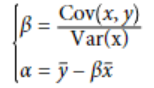

In [5]:
# ddof -> 공분산 계산시 자유도 조정 (default 1)
# ddof = 1 자유도 -> 평균 계산시 n-1로 설정
# ddof = 0 자유도 계산시 -> n으로 설정
beta = np.cov(x, y, ddof=0)[0,1] / x.var()
beta

0.49999999999999994

In [6]:
alpha = y.mean() - beta * x.mean()
alpha

2.0

In [7]:
y_ = alpha + beta * x

In [8]:
# element-wise로 거의 동일한지 비교
np.allclose(y_, y)

True

#### 최소자승 회귀분석이 계량경제학의 핵심 도구 이유
1. 수백년의 역사
2. 단순성
3. 확장성
4. 유연성
5. 유연성
6. 속도
7. 가용성

#### 잔차residual에 대한 가정 in OLS
1. 선형성
2. 독립성 - 독립변수끼리 상관관계 거의 x
3. 0-평균
4. 무상관성 - 독립변수와 상관관계 거의 x
5. 동질성 - 잔차의 표준편차 거의 상수
6. 무자기상관성 - 잔차끼리 서로 상관관계 거의 x

### 4.3 데이터 입수
* 데이터 가져오는 것!!!

#### 4.3.1 프로그래밍 가능한 API

* API를 사용해서 다양한 데이터를 얻을 수 있다~
* 금융 데이터의 유형

| 시간   | 구조적 데이터    | 비구조적 데이터 | 대안 데이터                  |
|--------|----------------|--------------|-----------------------------|
| 역사적   | 가격, 펀더멘털    | 뉴스, 텍스트  | 웹, 소셜미디어, 인공위성        |
| 실시간   | 가격, 거래량     | 뉴스, 공시    | 웹, 소셜미디어, 인공위성, 사물인터넷 |


#### 4.3.2 역사적, 구조적 데이터
* Eikon 데이터 API 사용 (유료 서비스)
* Refinity에서 api키 받아야 함 (현재는 LSEG로 이름 변경)
* eikon api 키 받는거 하다가 포기.. (어플 뭐야)
* 링크
https://developers.lseg.com/en/api-catalog/eikon/eikon-data-api/quick-start
* https://play.google.com/store/apps/details?id=com.refinitiv.android&hl=ko&gl=US


In [9]:
import eikon as ek

import configparser

c = configparser.ConfigParser()

c.read('../aiif.cfg')

ek.set_app_key(c['eikon']['app_id'])


KeyError: 'eikon'

In [ ]:
symbols = ['AAPL.0', 'MSFT.0','NFLX.0','AMZN.0']
data = ek.get_timeseries(symbols,
                         fields = 'CLOSE',
                         start_date= '2020-01-01',
                         end_date= '2023-12-31')

HTTP request failed: 'NoneType' object has no attribute 'http_request'


In [ ]:
data.info()

In [ ]:
data.tail()

#### 4.3.3 실시간, 구조적 데이터

In [ ]:
import tpqoa

oa = tpqoa.tpqoa("C:\Users\gjm10\Desktop\3학년 1학기\Passion_pay\tpqoa\aiif.cfg")
oa.stream_data("BTC_USD", stop=5)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1024497873.py, line 3)

## 4.4 규범적 이론의 재고


### 4.4.1 기대효용과 현실

### 4.4.2 평균-분산 포트폴리오 이론

* 가정 : 평균-분산 포트폴리오 이론을 이용하여 기술주 포트폴리오에 금 관련 ETF를 추가하고 싶어한다고 가정

* 코드 과정
    1. 해당 데이터 파일 가져오기
    2. 투자자가 목표로 하는 주식 코드를 선택
    3. 가격 시계열 데이터의 로그 수익률 계산

In [10]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision = 5, suppress = True,
                    formatter = {'float' : lambda x: f'{x:6.3f}'})

C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\2282903942.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [11]:
url = "http://hilpisch.com/aiif_eikon_eod_data.csv"

In [12]:
raw = pd.read_csv(url, index_col = 0, parse_dates=True).dropna()

In [13]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


<AxesSubplot: xlabel='Date'>

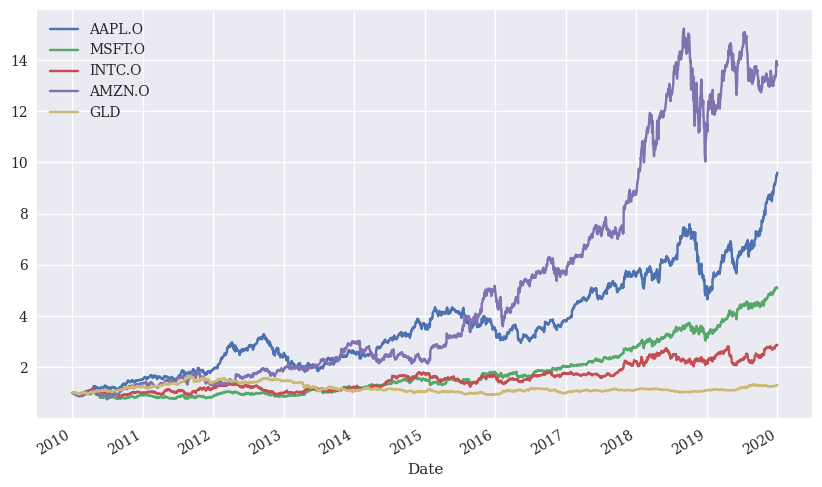

In [14]:
symbols = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O','GLD'] # 투자할 종목 코드 표시
rets = np.log(raw[symbols] / raw[symbols].shift(1)).dropna() # 모든 시계열에 대한 로그 수익률 계산
(raw[symbols] / raw[symbols].iloc[0]).plot(figsize=(10,6)) #  종목 별 정규화된 시계열 plot

In [15]:
# rets = np.log(raw[symbols] / raw[symbols].shift(1)).dropna()

In [16]:
# (raw[symbols] / raw[symbols].iloc[0]).plot(figsize=(10,6))

* 전체 기간 데이터를 사용하여 동일 가중 포트폴리오의 성능을 기준 성능으로 판단
* 종목 가중치에 대해 포트폴리오 수익률과 변동성과 샤프 비율을 계산

In [17]:
weights = len(rets.columns) * [1 / len(rets.columns)] # 동일 가중치

# 포트포리오 수익률 함수 정의
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252

port_return(rets, weights)

0.15694764653018103

In [18]:
# 포트폴리오 변동성 함수
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252, weights)) ** 0.5

port_volatility(rets, weights)

0.16106507848480675

In [19]:
# 포트폴리오 샤프 비율(0 단기 금리 가정)
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

port_sharpe(rets, weights)

0.9744362217225497

* 몬테카를로 시뮬레이션을 통해 여러 가지 무작위 포트폴리오 가중치에 해당하는 포트폴리오 수익률과 리스크, 샤프비율 분석하고자 한다.
* 공매도 배제, 포트폴리오의 가중치를 100% 채운다고 가정

In [20]:
# 가중치 시뮬레이션 (랜덤)
w = np.random.random((1000, len(symbols)))
w = (w.T / w.sum(axis=1)).T

In [21]:
w[:5]

array([[ 0.173,  0.348,  0.042,  0.389,  0.047],
       [ 0.122,  0.372,  0.137,  0.007,  0.362],
       [ 0.190,  0.233,  0.187,  0.384,  0.007],
       [ 0.326,  0.466,  0.039,  0.096,  0.073],
       [ 0.300,  0.145,  0.088,  0.169,  0.298]])

In [22]:
# 해당 포트폴리오의 수익률과 변동성 계산
pvr = [(port_volatility(rets[symbols], weights),
        port_return(rets[symbols], weights))
       for weights in w]

pvr = np.array(pvr)

In [23]:
# 샤프 비율 계산
psr = pvr[:, 1] / pvr[:, 0]

Text(0.5, 1.0, 'AAPL.O | MSFT.O | INTC.O | AMZN.O | GLD')

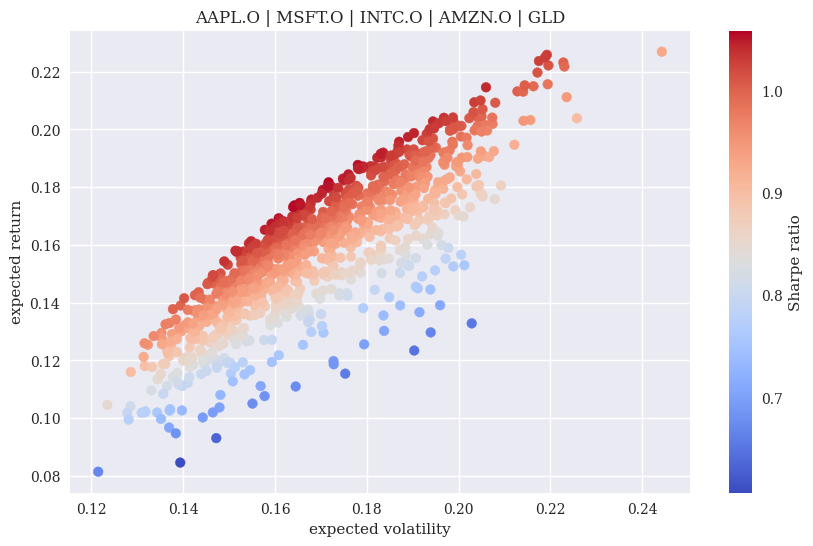

In [24]:
plt.figure(figsize=(10,6))
fig = plt.scatter(pvr[:, 0], pvr[:, 1],
                  c = psr, cmap= 'coolwarm')

cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.title(' | '.join(symbols))

* 2011년 초 시점을 포트폴리오 성능 백테스팅하고자 함
* 최적의 포트폴리오 구성 -> 2010년 시계열 데이터 기반
* 2012년 초의 포트폴리오 구성 -> 2011년 데이터

* 샤프 비율을 최대화하는 각 연도의 포트폴리오 가중치 구현

In [25]:
# 단일 주식의 가중치 한계 설정
bnds = len(symbols) * [(0,1),]
bnds

# 모든 가중치의 합 100%로 설정
cons = {'type': 'eq', 'fun': lambda weights: weights.sum()- 1}

In [26]:
opt_weights = {}
for year in range(2010, 2019):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31'] # 해당 연도의 데이터 선택
    ow = minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) *[1/ len(symbols)], bounds=bnds,
                  constraints=cons)['x'] 
    opt_weights[year] = ow #샤프 비율이 최대화되는 포트폴리오 가중치 계산 

In [27]:
# 가중치 계산
opt_weights

{2010: array([ 0.366,  0.000,  0.000,  0.056,  0.578]),
 2011: array([ 0.543,  0.000,  0.077,  0.000,  0.380]),
 2012: array([ 0.324,  0.000,  0.000,  0.471,  0.205]),
 2013: array([ 0.012,  0.305,  0.219,  0.464,  0.000]),
 2014: array([ 0.452,  0.115,  0.419,  0.000,  0.015]),
 2015: array([ 0.000,  0.000,  0.000,  1.000,  0.000]),
 2016: array([ 0.150,  0.260,  0.000,  0.058,  0.533]),
 2017: array([ 0.231,  0.203,  0.031,  0.109,  0.426]),
 2018: array([ 0.000,  0.295,  0.000,  0.705,  0.000])}

* 백테스팅 결과 완성하기 위해 다음 코드 구현
* 전년도 실현 데이터로 계산한 포트폴리오 기대 수익률과 실제 데이터 계산한 포트폴리오 실현 수익률 비교

In [28]:
res = pd.DataFrame()

# 년도별로 반복 처리
for year in range(2010, 2019):
    # 예상 기간 계산
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    epv = port_volatility(rets_, opt_weights[year])  # 예상 기간 변동성
    epr = port_return(rets_, opt_weights[year])  # 예상 기간 수익률
    esr = epr / epv  # 예상 샤프비율

    # 다음 해의 실현 기간 계산
    rets_ = rets[symbols].loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
    rpv = port_volatility(rets_, opt_weights[year])  # 실현 기간 변동성
    rpr = port_return(rets_, opt_weights[year])  # 실현 기간 수익률
    rsr = rpr / rpv  # 실현 샤프비율

    # 해당 연도의 결과를 DataFrame에 추가
    res = res.append(pd.DataFrame({
        'epv': [epv],
        'epr': [epr],
        'esr': [esr],
        'rpv': [rpv],
        'rpr': [rpr],
        'rsr': [rsr]
    }, index=[year + 1]))

C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\1340861415.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\1340861415.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\1340861415.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\1340861415.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\1340861415

In [29]:
res

,epv,epr,esr,rpv,rpr,rsr
2011,0.157440,0.303003,1.924564,0.160622,0.133836,0.833235
2012,0.173279,0.169321,0.977156,0.182292,0.161375,0.885256
2013,0.202460,0.278459,1.375378,0.168714,0.166897,0.989228
2014,0.181544,0.368961,2.032353,0.197798,0.026830,0.135645
2015,0.160340,0.309486,1.930190,0.211368,-0.024560,-0.116194
2016,0.326730,0.778330,2.382179,0.296565,0.103870,0.350242
2017,0.106148,0.090933,0.856663,0.079521,0.230630,2.900235
2018,0.086548,0.260702,3.012226,0.157337,0.038234,0.243004
2019,0.323796,0.228008,0.704174,0.207672,0.275819,1.328147


In [30]:
res.mean()

epv    0.190920
epr    0.309689
esr    1.688320
rpv    0.184654
rpr    0.123659
rsr    0.838755
dtype: float64

* 기대 변동성과 실현변동성 비교
* 평균-분산 포트폴리오 이론
    * 포트폴리오로 변동성 예측시 좋은 성능 보임
* 이 두 시계열 -> 높은 상관관계 증명

In [31]:
res[['epv', 'rpv']].corr()

,epv,rpv
epv,1.000000,0.765733
rpv,0.765733,1.000000


<AxesSubplot: title={'center': 'Expected vs. Realized Portfolio Volatility'}>

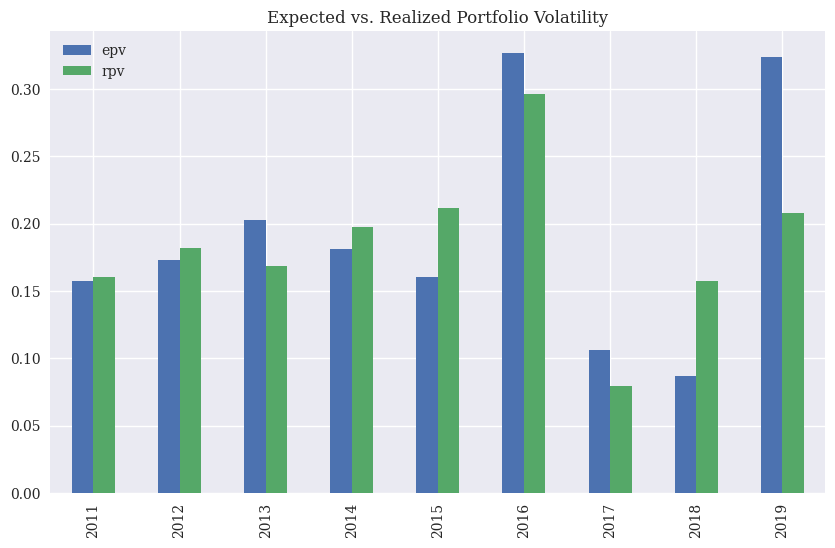

In [32]:
res[['epv','rpv']].plot(kind='bar', figsize=(10,6),
                        title = "Expected vs. Realized Portfolio Volatility")

* 반대로 수익률 부분에서는 음의 상관관계 보임
    * 즉, 평균-분산 포트폴리오 이론은 포트폴리오 수익률을 예측하는 데 실패 (기대 수익률과 실현 수익률)

In [33]:
res[['esr', 'rsr']].corr()

,esr,rsr
esr,1.000000,-0.698607
rsr,-0.698607,1.000000


<AxesSubplot: title={'center': 'Expected vs. Realized Portfolio Volatility'}>

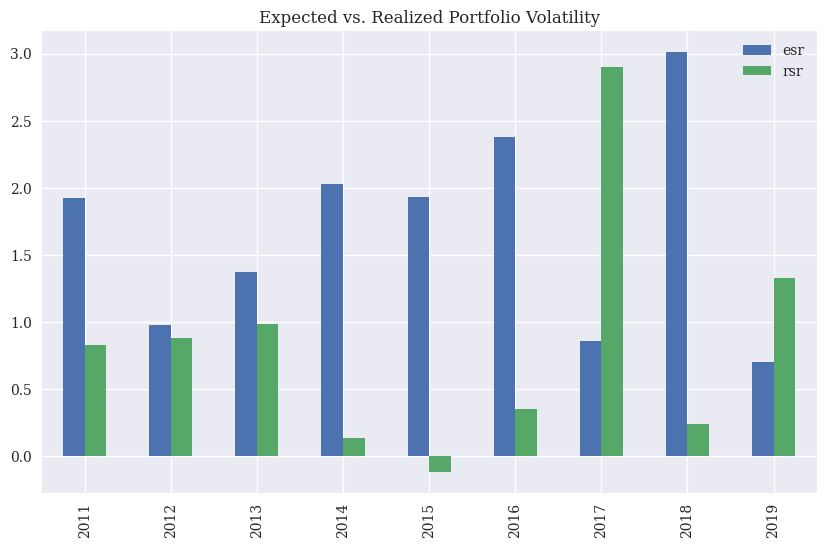

In [34]:
res[['esr','rsr']].plot(kind='bar', figsize=(10,6),
                        title = "Expected vs. Realized Portfolio Volatility")

### 4.4.3 자본자산 가격결정 모형(CAPM)

* 가정
    * 앞서 4개의 기술주에 대한 기대 수익률을 CAPM으로 계산히기를 원한다고 가정
    * 주어진 해에 대해 모든 주식의 베타 결정 -> 그다음 해의 주식 기대 수익률은 주어진 베터와 시장 포트폴리오의 성능을 이용해 계산
    * 시장 포트플리오는 S&P 500 지수 사용

In [35]:
import pandas as pd
import numpy as np

r = 0.005
market = '.SPX'

# 로그 수익률 계산
rets = np.log(raw / raw.shift(1)).dropna()

# 결과를 저장할 DataFrame 초기화
res = pd.DataFrame()

# 선택된 컬럼에 대해서만 반복
for sym in rets.columns[:4]:
    print(f"\n{sym}")
    print("=" * 54)  # 구분선 출력

    # 연도별 반복 처리
    for year in range(2010, 2019):
        # 해당 연도의 데이터 추출
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']

        # 시장 수익률의 평균과 공분산, 분산 계산
        muM = rets_[market].mean() * 252
        cov = rets_.cov().loc[sym, market]
        var = rets_[market].var()
        beta = cov / var

        # 다음 연도의 수익률 계산
        rets_ = rets.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
        mu_real = rets_[sym].mean() * 252
        mu_capm = r + beta * (muM - r)

        # 결과 DataFrame에 추가
        res = res.append(pd.DataFrame({
            'symbol': [sym],
            'mu_capm': [mu_capm],
            'mu_real': [mu_real]
        }, index=[year + 1]), sort=True)

        # 결과 출력
        print(f"{year + 1}: beta: {beta:.3f}, mu_capm: {mu_capm:.3f}, mu_real: {mu_real:.3f}")

# 결과 DataFrame 출력
print(res)


# mu_capm 책 결과랑 다름



AAPL.O
2011: beta: 1.052, mu_capm: 0.110, mu_real: 0.228
2012: beta: 0.764, mu_capm: 0.001, mu_real: 0.275
2013: beta: 1.266, mu_capm: 0.159, mu_real: 0.053
2014: beta: 0.630, mu_capm: 0.165, mu_real: 0.320
2015: beta: 0.833, mu_capm: 0.091, mu_real: -0.047
2016: beta: 1.144, mu_capm: -0.009, mu_real: 0.096
2017: beta: 1.009, mu_capm: 0.092, mu_real: 0.381
2018: beta: 1.379, mu_capm: 0.244, mu_real: -0.071
2019: beta: 1.252, mu_capm: -0.082, mu_real: 0.621

MSFT.O
2011: beta: 0.890, mu_capm: 0.094, mu_real: -0.072
2012: beta: 0.816, mu_capm: 0.001, mu_real: 0.029
2013: beta: 1.109, mu_capm: 0.140, mu_real: 0.337
2014: beta: 0.876, mu_capm: 0.228, mu_real: 0.216
2015: beta: 0.955, mu_capm: 0.103, mu_real: 0.178
2016: beta: 1.249, mu_capm: -0.010, mu_real: 0.113
2017: beta: 1.224, mu_capm: 0.110, mu_real: 0.321
2018: beta: 1.303, mu_capm: 0.231, mu_real: 0.172
2019: beta: 1.442, mu_capm: -0.095, mu_real: 0.440

INTC.O
2011: beta: 1.081, mu_capm: 0.113, mu_real: 0.142
2012: beta: 0.842, 

C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\3982725037.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\3982725037.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\3982725037.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\3982725037.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({
C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\3982725037

In [37]:
sym = 'AMZN.O'
res[res['symbol'] == sym].corr()


C:\Users\gjm10\AppData\Local\Temp\ipykernel_35164\3122824694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  res[res['symbol'] == sym].corr()


,mu_capm,mu_real
mu_capm,1.000000,-0.209043
mu_real,-0.209043,1.000000


* 전년도 베타 및 올해의 시장 포트폴리오 성능 감안 시, 단일 종목의 기대 수익율과 올해 주식의 실현 수익률 비교
* 베타만을 기반으로 한 CAPM은 주식의 실적 예측 시, 그다지 유용하지 않을 수 잇따!!

<AxesSubplot: title={'center': 'AMZN.O'}>

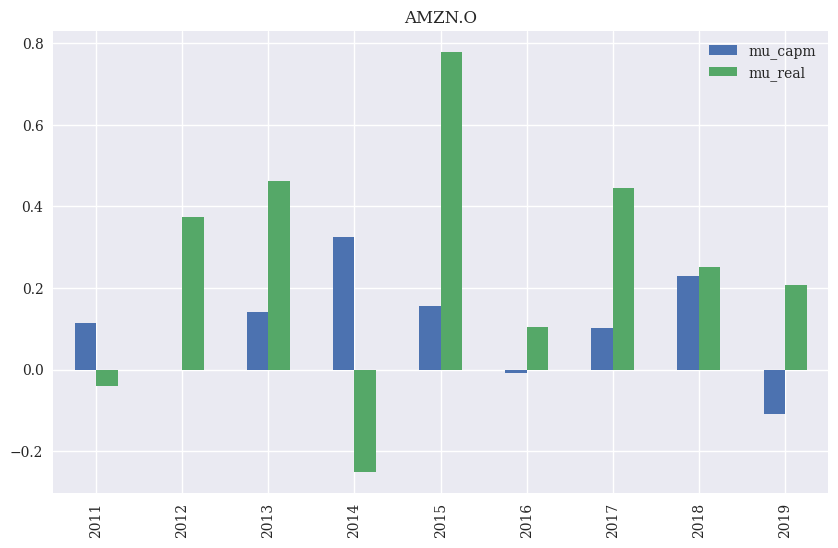

In [38]:
res[res['symbol'] == sym].plot(kind = 'bar',
                               figsize = (10,6), title = sym)

* CAPM이 예상한 주식 수익률의 평균을 실현 수익률의 평균과 비교 (하나 빼면 성능 별로 좋지 않음)
* 예측값은 12.2%~14.4% 사이지만, 실제 평균 실현 수익률은 9.4% ~ 29.2% 사이의 높은 변화

**즉, 시장 포트폴리오 성능과 베타만으로는 기술주의 실제 수익률 설명 x**

In [39]:
grouped = res.groupby('symbol').mean()
grouped

,mu_capm,mu_real
symbol,,
AAPL.O,0.085617,0.206158
AMZN.O,0.105916,0.259395
INTC.O,0.090546,0.116180
MSFT.O,0.088990,0.192655


<AxesSubplot: title={'center': 'Average Values'}, xlabel='symbol'>

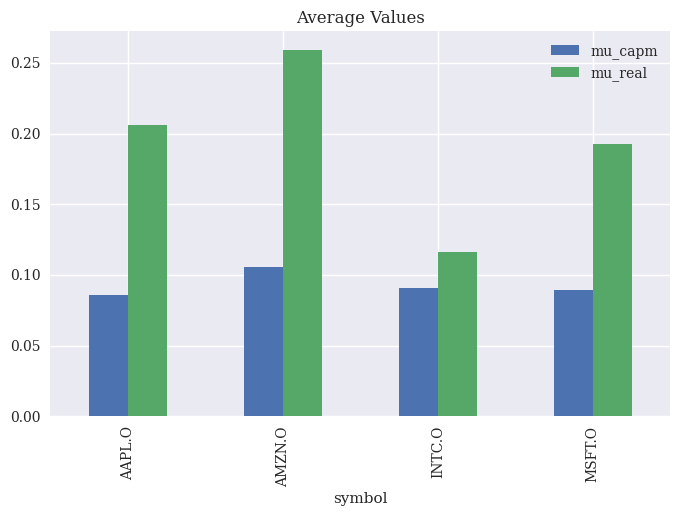

In [41]:
grouped.plot(kind='bar', figsize= (8,5), title= "Average Values")

### 4.4.4 차익거래 가격결정 이론